# Confidence Interval - Exercises

In [89]:
import numpy as np
from scipy.stats import t, norm

# Set a random seed for reproducibility
np.random.seed(42)

In [90]:
# Function to generate fake data and calculate confidence interval for population mean
def confidence_interval_mean(n, mean, std, confidence_level):
    if n > 30:
        # Z-score for large sample sizes
        # alternatively,
        ## norm.ppf(1 - (1 - confidence_level) / 2)
        ## -1 * norm.ppf((1 - confidence_level) / 2)
        critical_value = norm.ppf((1 + confidence_level) / 2)
    else:
        # T-score for small sample sizes
        critical_value = t.ppf((1 + confidence_level) / 2, df=n - 1)
    
    margin_of_error = critical_value * (std / np.sqrt(n))
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    
    return confidence_interval

In [91]:
def confidence_interval_proportion(n, p, confidence_level):
    critical_value = norm.ppf((1 + confidence_level) / 2)
    
    margin_of_error = critical_value * np.sqrt((p * (1 - p)) / n)
    confidence_interval = (p - margin_of_error, p + margin_of_error)
    
    return confidence_interval

In [92]:
def confidence_interval_difference_means(n1, mean1, std1, n2, mean2, std2, confidence_level):
    if n1 > 30 and n2 > 30:
        # Z-score for large sample sizes
        critical_value = norm.ppf((1 + confidence_level) / 2)
    else:
        # T-score for small sample sizes
        critical_value = t.ppf((1 + confidence_level) / 2, df=n1 + n2 - 2)
    
    margin_of_error = critical_value * np.sqrt((std1**2 / n1) + (std2**2 / n2))
    confidence_interval = (mean1 - mean2 - margin_of_error, mean1 - mean2 + margin_of_error)
    
    return confidence_interval

In [93]:
def confidence_interval_difference_proportions(n1, p1, n2, p2, confidence_level):
    critical_value = norm.ppf((1 + confidence_level) / 2)
    
    margin_of_error = critical_value * np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))
    confidence_interval = (p1 - p2 - margin_of_error, p1 - p2 + margin_of_error)
    
    return confidence_interval

#### **Confidence Interval for the Mean**

##### 1. From a population with an unknown mean, a random sample of 50 observations is taken. The sample mean is 130, and the sample standard deviation is 22. Construct a 95% confidence interval for the population mean.

In [94]:
n = 50
mean = 130
std = 22
cl = 0.95

confidence_interval_mean(n, mean, std, cl)

(123.90202317286142, 136.09797682713858)

##### 2. In a manufacturing process, a sample of 30 products is tested, and the sample mean breaking strength is 400 Newtons with a sample standard deviation of 50 Newtons. Construct a 99% confidence interval for the true mean breaking strength of the products.

In [95]:
n = 30
mean = 400
std = 50
cl = 0.99

confidence_interval_mean(n, mean, std, cl)

(374.8377543895083, 425.1622456104917)

##### 3. A study is conducted to estimate the average IQ of a population. A random sample of 100 individuals is taken, and the sample mean IQ is 115 with a sample standard deviation of 12. Construct a 90% confidence interval for the population mean IQ.

In [96]:
n = 100
mean = 115
std = 12
cl = 0.9

confidence_interval_mean(n, mean, std, cl)

(113.02617564765823, 116.97382435234177)

#### **Confidence Interval for the Proportional**

##### 4. In a survey of 200 individuals, 40 report being frequent users of a certain product. Construct a 95% confidence interval for the true proportion of frequent users in the population.

In [97]:
n = 200
p = 40 / 200
cl = 0.95

confidence_interval_proportion(n, p, cl)

(0.14456384702601288, 0.25543615297398714)

##### 5. A drug trial involves 120 patients, and 25 of them show positive results. Construct a 98% confidence interval for the proportion of patients in the population who respond positively to the drug.

In [98]:
n = 120
p = 25 / 120
cl = 0.98

confidence_interval_proportion(n, p, cl)

(0.12208820037298355, 0.2945784662936831)

#### **Confidence Interval for the Difference in Means**

##### 6. Two different teaching methods are compared. In the first group of 35 students, the average test score is 75 with a standard deviation of 10. In the second group of 40 students, the average test score is 78 with a standard deviation of 12. Construct a 95% confidence interval for the difference in mean test scores between the two groups.

In [99]:
n1 = 35
mean1 = 75
std1 = 10
n2 = 40
mean2 = 78
std2 = 12
cl = 0.95

confidence_interval_difference_means(n1, mean1, std1, n2, mean2, std2, cl)

(-7.980446604979668, 1.9804466049796678)

Since the _confidence interval_ ***includes zero***, it suggests that, based on the _sample data_ and at the _95% confidence level_, **we _cannot_ conclude that there is a statistically significance difference in mean** scores between the two group of students. The observed difference _may be_ due to _random variations_. There is a possibility that the true difference is zero or close to zero. But, to conclude that, we need to perform a more robust statistical testing.

Let's explore each confidence interval of the mean separately.

**Computing the CI for each group individually**

In [100]:
ci1 = confidence_interval_mean(n1, mean1, std1, cl)
ci2 = confidence_interval_mean(n2, mean2, std2, cl)

ci1, ci2

((71.68705619870263, 78.31294380129737),
 (74.28122980617263, 81.71877019382737))

In [101]:
# mean1 ~ N(mean1, std1 / sqrt(n1))
# mean2 ~ N(mean2, std2 / sqrt(n2))

mean_dist1 = np.random.normal(mean1, std1 / np.sqrt(n1), 10000)
mean_dist2 = np.random.normal(mean2, std2 / np.sqrt(n2), 10000)

In [102]:
ci2

(74.28122980617263, 81.71877019382737)

In [103]:
from scipy import stats
def sample_mean_dist(x, n, mean, std):
    return stats.norm.pdf(x, mean, std / np.sqrt(n))

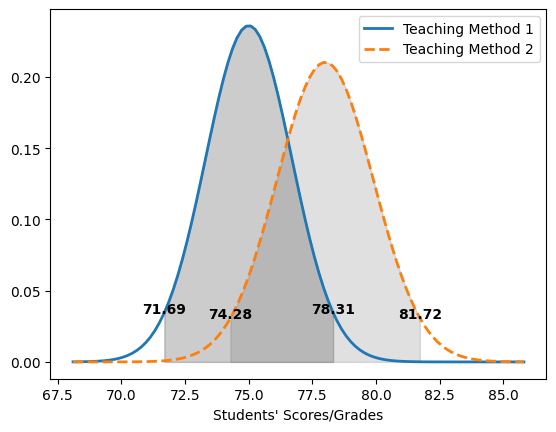

In [104]:
import matplotlib.pyplot as plt

x = np.linspace(min(ci1[0], ci2[0]) * 0.95, max(ci1[1], ci2[1]) * 1.05, 100)
mean_dist1 = sample_mean_dist(x, n1, mean1, std1)
plt.plot(x, mean_dist1, lw=2, label="Teaching Method 1")
plt.fill_between(x.clip(ci1[0], ci1[1]), 0, mean_dist1, alpha=0.2, color="0.0")

plt.text(ci1[0], sample_mean_dist(ci1[0], n1, mean1, std1),
         f'{ci1[0]:.2f}', ha='center', weight='bold')
plt.text(ci1[1], sample_mean_dist(ci1[1], n1, mean1, std1),
         f'{ci1[1]:.2f}', ha='center', weight='bold')

mean_dist2 = sample_mean_dist(x, n2, mean2, std2)
plt.plot(x, mean_dist2, lw=2, label="Teaching Method 2", linestyle="--")
plt.fill_between(x.clip(ci2[0], ci2[1]), 0, mean_dist2, alpha=0.2, color="0.4")
plt.text(ci2[0], sample_mean_dist(ci2[0], n2, mean2, std2),
         f'{ci2[0]:.2f}', ha='center', weight='bold')
plt.text(ci2[1], sample_mean_dist(ci2[1], n2, mean2, std2),
         f'{ci2[1]:.2f}', ha='center', weight='bold')


plt.xlabel("Students' Scores/Grades")
plt.legend()


We can see that the _95% CI_ of the students' grades resulting from the two teaching methods **overlap with each other**.
Since the intervals **do overlap**, **we can’t say that the difference in means is _statistically significant_**. At least not yet. Importantly, **overlapping confidence intervals** _is not enough to say_ that the difference between the groups is not statistically significant

However, **if they didn’t overlap, that would mean they are statistically different**.
In other words, **nonoverlapping confidence intervals** is _conservative evidence_ for statistical significance.

_Extracted from the book: "Causal Inference in Python" by Matheus Facure._

##### 7. Suppose you are a data scientist working for a company that is testing the effectiveness of two different advertising strategies (A and B) to promote a new product. The company has collected data on the number of product purchases from a sample of users exposed to each advertising strategy. Compute the confidence interval for the difference in means with a confidence level of 95%.

In [105]:
# collected data
import numpy as np

np.random.seed(123)  # For reproducibility

# Simulating data for advertising strategy A and B
strategy_A = np.random.normal(25, 5, 1000)  # Mean: 25, Standard Deviation: 5
strategy_B = np.random.normal(28, 5, 1000)  # Mean: 28, Standard Deviation: 5


In [106]:
mean_A = np.mean(strategy_A)
std_A = np.std(strategy_A)
n_A = len(strategy_A)
mean_B = np.mean(strategy_B)
std_B = np.std(strategy_B)
n_B = len(strategy_B)
cl = 0.95

ci = confidence_interval_difference_means(n_A, mean_A, std_A, n_B, mean_B, std_B, cl)
ci

(-3.669101314792699, -2.8104317199739475)

Since the Confidence Interval of Means **does not include** zero, it _suggests_ (not necessarily proves) that, at 95% confidence level, this difference is _statistically significant_. The data provide evidence that the true difference is unlikely to be zero.

Mean purchases of Strategy B is greater than Strategy B with a statistically significance.

<span style="border: 1px solid gray">
<b>True interpretation:</b> If you would calculate the confidence interval over an infinite number of samples with the same sample sizes, then <b>95% of the calculated confidence intervals will contain the proportions' difference true value</b>.
</span>

Let's analyze each CI individually.

**Computing the CI for each group individually**

In [107]:
ci_A = confidence_interval_mean(n_A, mean_A, std_A, cl)
ci_B = confidence_interval_mean(n_B, mean_B, std_B, cl)

ci_A, ci_B

((24.492037747523604, 25.11232089166848),
 (27.74506105539064, 28.338830618568092))

In [108]:
# mean1 ~ N(mean1, std1 / sqrt(n1))
# mean2 ~ N(mean2, std2 / sqrt(n2))

mean_dist_A = np.random.normal(mean_A, std_A / np.sqrt(n_A), 10000)
mean_dist_B = np.random.normal(mean_B, std_B / np.sqrt(n_B), 10000)

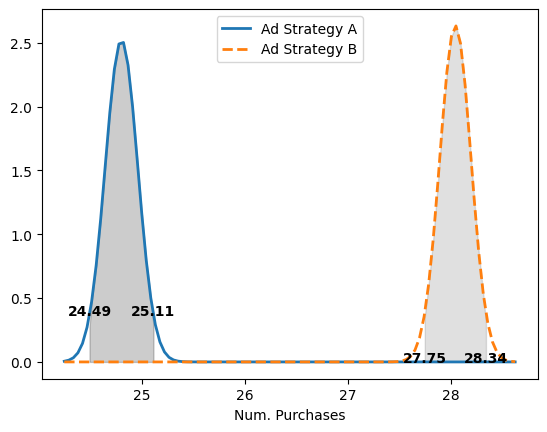

In [109]:
x = np.linspace(min(ci_A[0], ci_B[0]) * 0.99, max(ci_A[1], ci_B[1]) * 1.01, 100)

mean_dist_A = sample_mean_dist(x, n_A, mean_A, std_A)
plt.plot(x, mean_dist_A, lw=2, label="Ad Strategy A")
plt.fill_between(x.clip(ci_A[0], ci_A[1]), 0, mean_dist_A, alpha=0.2, color="0.0")

plt.text(ci_A[0], sample_mean_dist(ci_A[0], n_A, mean_A, std_A),
         f'{ci_A[0]:.2f}', ha='center', weight='bold')
plt.text(ci_A[1], sample_mean_dist(ci_A[1], n_A, mean_A, std_A),
         f'{ci_A[1]:.2f}', ha='center', weight='bold')

mean_dist_B = sample_mean_dist(x, n_B, mean_B, std_B)
plt.plot(x, mean_dist_B, lw=2, label="Ad Strategy B", linestyle="--")
plt.fill_between(x.clip(ci_B[0], ci_B[1]), 0, mean_dist_B, alpha=0.2, color="0.4")
plt.text(ci_B[0], sample_mean_dist(ci_B[0], n2, mean_A, std_A),
         f'{ci_B[0]:.2f}', ha='center', weight='bold')
plt.text(ci_B[1], sample_mean_dist(ci_B[1], n2, mean_A, std_A),
         f'{ci_B[1]:.2f}', ha='center', weight='bold')


plt.xlabel("Num. Purchases")
plt.legend()

We can see that **there is no overlapping between the CIs**. Therefore, this _suggests_ (not necessarily proves) that, at 95% confidence level_, **both means are _statistically_ different**.

##### 7. A company implements a new training program for two different departments. In the first department, the average productivity of 25 employees increases by 15 units with a standard deviation of 20. In the second department, the average productivity of 30 employees increases by 18 units with a standard deviation of 25. Construct a 99% confidence interval for the difference in mean productivity improvements between the two departments.

In [110]:
n_A = 25
mean_A = 15
std_A = 20
n_B = 30
mean_B = 18
std_B = 25
cl = 0.99

confidence_interval_difference_means(n_A, mean_A, std_A, n_B, mean_B, std_B, cl)

(-19.21541756115709, 13.21541756115709)

Since the _confidence interval in means_ **includes zero**, we cannot say that both training programs produces statistcally different results.

#### **Confidence Interval for the Difference in Proportions**

##### 8. In a survey of 200 customers, 50 from Company A and 30 from Company B report being satisfied with a product. Construct a 95% confidence interval for the difference in proportions of satisfied customers between the two companies.

In [111]:
# 200 customers interviewed from company A and other 200 from company B
n_A = n_B = 200

# proportion being satisfied
p_A = 50 / n_A
p_B = 30 / n_B

cl = 0.95

confidence_interval_difference_proportions(n_A, p_A, n_B, p_B, cl)

(0.022216340773956594, 0.17778365922604342)

Since the _confidence interval_ **doesn't include zero**, it _suggests_ (not necessarily proves) that, at 95% _confidence level_, the difference is statistically significant.

#### 9. Consider a scenario where you want to compare the proportion of customers satisfied with two different products (Product A and Product B). You have conducted a survey and obtained the following results:

- For Product A, out of 150 customers surveyed, 110 reported being satisfied.
- For Product B, out of 180 customers surveyed, 130 reported being satisfied.

Now, your task is to compute a 95% confidence interval for the difference in proportions and determine if the difference is statistically significant.

In [112]:
n_A = 150
p_a = 110 / n_A
n_B = 180
p_b = 130 / n_B
cl = 0.95

confidence_interval_difference_proportions(n_A, p_a, n_B, p_b, cl)

(-0.08527138417619465, 0.10749360639841679)

Since the _confidence interval_ **doesn't include zero**, it _suggests_ (not necessarily proves) that, at 95% _confidence level_, the difference is statistically significant.

That is, customers from Company A are statically more satisfied with the product than Company B.

#### 10. Confidence Interval for Percentile.

Consider a scenario where you have a sample of 50 students' grades, and you want to compute the 90th percentile of the grades. The grades range from 0 to 100. Compute a 95% confidence Interval for the 90th percentile.

In [113]:
# fake data
np.random.seed(42)

grades = np.random.randint(0, 101, 50)
grades

array([ 51,  92,  14,  71,  60,  20,  82,  86,  74,  74,  87,  99,  23,
         2,  21,  52,   1,  87,  29,  37,   1,  63,  59,  20,  32,  75,
        57,  21,  88,  48,  90,  58,  41,  91,  59,  79,  14,  61,  61,
        46,  61,  50,  54,  63,   2, 100,  50,   6,  20,  72])

In [114]:
# 90th percentile of the sample
np.percentile(grades, 90)

88.2

In [115]:
n_bootstrap_sets = 10000
percentile = 90

perc_90th_list = []
for _ in range(n_bootstrap_sets):
    sample = np.random.choice(grades, len(grades), replace=True)
    perc_90th_list.append(np.percentile(sample, percentile))

ci = (np.percentile(perc_90th_list, 2.5),
      np.percentile(perc_90th_list, 97.5))
ci

(79.0, 92.70000000000002)

## Exercises about metrics

#### 11. You have a binary classifier for a disease detection task. In a sample of 200 individuals, the classifier predicted 25 true positives and 10 false positives. Compute a 95% confidence interval for precision.

**Central Limit Theorem**

In [116]:
sample_size = 200

tp = 25
fp = 10
cl = 0.95

n = tp + fp

precision = tp / (tp + fp)

confidence_interval_proportion(n, precision, cl)

(0.5646221689680575, 0.8639492596033711)

**Bootstrapping**

In [117]:
# Bootstrapping
precision_values = []
for _ in range(10000):  # You may choose the number of bootstrap samples
    resampled_TP = np.random.choice([1] * tp + [0] * fp, size=n, replace=True)
    resampled_precision = np.sum(resampled_TP) / (np.sum(resampled_TP) + np.sum(1 - resampled_TP))
    precision_values.append(resampled_precision)

confidence_interval_precision = np.percentile(precision_values, [2.5, 97.5])
print("95% Confidence Interval for Precision:", confidence_interval_precision)

95% Confidence Interval for Precision: [0.57142857 0.85714286]


#### 12. Using the same disease detection task data, you observed 25 true positives and 5 false negatives. Compute a 90% confidence interval for recall.

**Central Limit Theorem**

In [118]:
tp = 25
fn = 5
cl = 0.9

n = tp + fn

recall = tp / (tp + fn)

confidence_interval_proportion(n, recall, cl)

(0.7214152197889628, 0.9452514468777039)

**Bootstrapping**

In [119]:
# Bootstrapping
recall_values = []
for _ in range(10000):
    resampled_TP = np.random.choice([1] * tp + [0] * fn, size=n, replace=True)
    resampled_recall = np.sum(resampled_TP) / (np.sum(resampled_TP) + np.sum(1 - resampled_TP))
    recall_values.append(resampled_recall)

# Calculate confidence interval
confidence_interval_recall = np.percentile(recall_values, [2.5, 97.5])
print("95% Confidence Interval for Recall:", confidence_interval_recall)


95% Confidence Interval for Recall: [0.7        0.96666667]


#### 13. Suppose you have the following data for two classifiers (Classifiers A and B) on a binary classification task:

Classifier A:
- True Positives (TP_A): 35
- False Positives (FP_A): 10

Classifier B:
- True Positives (TP_B): 28
- False Positives (FP_B): 5

Your goal is to compute a confidence interval for the difference in precision between Classifier A and Classifier B and determine if the difference is statistically significant at a 95% confidence level.

**Central Limit Theorem**

In [120]:
tp_A = 35
fp_A = 10
tp_B = 28
fp_B = 5

n_A = tp_A + fp_A
n_B = tp_B + fp_B

precision_A = tp_A / (tp_A + fp_A)
precision_B = tp_B / (tp_B + fp_B)

cl = 0.95

confidence_interval_difference_proportions(n_A, precision_A, n_B, precision_B, cl)

(-0.24310129904100702, 0.10168715762686559)

Since the confidence interval includes 0, we cannot conclude that the difference in precision between the two models is statistically significant.

**Bootstrapping**

In [121]:
import numpy as np

# Original data for Classifier A
TP_A = 35
FP_A = 10
n_A = TP_A + FP_A

# Original data for Classifier B
TP_B = 28
FP_B = 5
n_B = TP_B + FP_B

# Number of bootstrap samples
n_bootstrap_sets = 10000

# Bootstrapping
precision_diff_values = []
for _ in range(n_bootstrap_sets):
    # Sample `n_A` values ([0] or [1]) with replacement from the original data,
    # by using the same original proportion of True Positives (TP) and False Positives (FP).
    # The sum of the sampled values (basically, sum of 1) will be the resampled number of True Positives (TP)
    # Its complement will be the resampled False Positives (FP).
    # For example, if in 100 resampled values, 75 are 1s, then TP = 75 and FP = 25.
    # We used the same number of values as the original data (TP + FP).
    resampled_TP_A = np.random.choice([1] * TP_A + [0] * FP_A, size=n_A, replace=True)
    resampled_TP_A = np.sum(resampled_TP_A)
    resampled_FP_A = n_A - resampled_TP_A

    resampled_TP_B = np.random.choice([1] * TP_B + [0] * FP_B, size=n_B, replace=True)
    resampled_TP_B = np.sum(resampled_TP_B)
    resampled_FP_B = n_B - resampled_TP_B

    # precision for the bootstrapping iteration
    precision_A = resampled_TP_A / (resampled_TP_A + resampled_FP_A)
    precision_B = resampled_TP_B / (resampled_TP_B + resampled_FP_B)
    
    precision_diff_values.append(precision_A - precision_B)

# Calculate confidence interval at 95% CL
confidence_interval_precision_diff = np.percentile(precision_diff_values, [2.5, 97.5])

# Check if the confidence interval excludes zero (statistically significant)
statistically_significant = (0 < confidence_interval_precision_diff[0]) or \
                            (0 > confidence_interval_precision_diff[1])

print("95% Confidence Interval for Precision Difference:", confidence_interval_precision_diff)
print("Is the difference statistically significant?", statistically_significant)


95% Confidence Interval for Precision Difference: [-0.23636364  0.1030303 ]
Is the difference statistically significant? False


#### 14. Suppose you have the following data for two classification methods (Methods 1 and 2) on a binary classification task:

Method 1:
- True Positives (TP1): 10
- False Negatives (FN1): 85

Method 2:
- True Positives (TP2): 80
- False Negatives (FN2): 15

Your goal is to construct a 99% confidence interval for the difference in recall between Method 1 and Method 2.

**Central Limit Theorem**

In [122]:
TP_A = 10
FN_A = 85
n_A = TP_A + FN_A
recall_A = TP_A / (TP_A + FN_A)

TP_B = 80
FN_B = 15
n_B = TP_B + FN_B
recall_B = TP_B / (TP_B + FN_B)

cl = 0.99

confidence_interval_difference_proportions(n_A, recall_A, n_B, recall_B, cl)

(-0.8627951302085407, -0.610889080317775)

Since the CI **does not include Zero**, it suggests that the difference is _statistically significant_.

**Bootstrapping**

In [123]:
n_bootstrap_sets = 10000

recall_diff_values = []
for _ in range(n_bootstrap_sets):
    resampled_TP_A = np.random.choice([1] * TP_A + [0] * FN_A, size=n_A, replace=True)
    resampled_TP_A = np.sum(resampled_TP_A)
    resampled_FN_A = n_A - resampled_TP_A

    resampled_TP_B = np.random.choice([1] * TP_B + [0] * FN_B, size=n_B, replace=True)
    resampled_TP_B = np.sum(resampled_TP_B)
    resampled_FN_B = n_B - resampled_TP_B
    
    recall_A = resampled_TP_A / (resampled_TP_A + resampled_FN_A)
    recall_B = resampled_TP_B / (resampled_TP_B + resampled_FN_B)
    
    recall_diff_values.append(recall_A - recall_B)

confidence_interval_recall_diff = np.percentile(recall_diff_values, [0.5, 99.5])
statistically_significant = (0 < confidence_interval_recall_diff[0]) or \
                            (0 > confidence_interval_recall_diff[1])

print("99% Confidence Interval for Recall Difference:", confidence_interval_recall_diff)
print("Is the difference statistically significant?", statistically_significant)

99% Confidence Interval for Recall Difference: [-0.85263158 -0.61052632]
Is the difference statistically significant? True


#### 15. Suppose you have the following data for two classifiers (Classifiers A and B) on a binary classification task:

Classifier A:
- True Positives (TP_A): 50
- False Positives (FP_A): 10
- True Negatives (TN_A): 110
- False Negatives (FN_A): 30

Classifier B:
- True Positives (TP_B): 20
- False Positives (FP_B): 50
- True Negatives (TN_B): 120
- False Negatives (FN_B): 60

Now, your goal is to compute a confidence interval for the difference in accuracy between Classifier A and Classifier B and determine if the difference is statistically significant at a 95% confidence level.

**Central Limit Theorem**

In [124]:
TP_A = 50
FP_A = 10
TN_A = 110
FN_A = 30
n_pos_A = TP_A + FN_A
n_neg_A = FP_A + TN_A
n_A = TP_A + FP_A + TN_A + FN_A

accuracy_A = (TP_A + TN_A) / n_A

TP_B = 20
FP_B = 50
TN_B = 70
FN_B = 60
n_pos_B = TP_B + FN_B
n_neg_B = FP_B + TN_B
n_B = TP_B + FP_B + TN_B + FN_B

accuracy_B = (TP_B + TN_B) / n_B

cl = 0.95

print(f'Accuracy A: {accuracy_A:.2f}')
print(f'Accuracy B: {accuracy_B:.2f}')

confidence_interval_difference_proportions(n_A, accuracy_A, n_B, accuracy_B, cl)

Accuracy A: 0.80
Accuracy B: 0.45


(0.261529822272337, 0.43847017772766306)

Since the Confidence Interval **does not include Zero**, at 95% confidence level, the difference in accuracies between the two classifiers is _statistically significant_. Since the CI values are positive, classifier A is statistically better (in accuracy) than classifier B at 95% confidence level.

**Bootstrapping**

In [125]:
def calculate_accuracy(TP, FP, TN, FN):
    return (TP + TN) / (TP + FP + TN + FN)

n_bootstrap_sets = 10000

accuracy_diff_values = []
for _ in range(n_bootstrap_sets):
    # For the number of positives in the datasets, resample the TP and FN by
    # using the same original proportion of TP and FN.
    resampled_TP_A = np.random.choice([1] * TP_A + [0] * FN_A, size=n_pos_A, replace=True)
    resampled_TP_A = np.sum(resampled_TP_A)
    resampled_FN_A = n_pos_A - resampled_TP_A

    # For the number of negatives in the datasets, resample the FP and TN by
    # using the same original proportion of FP and TN. 
    resampled_TN_A = np.random.choice([1] * TN_A + [0] * FP_A, size=n_neg_A, replace=True)
    resampled_TN_A = np.sum(resampled_TN_A)
    resampled_FP_A = n_neg_A - resampled_TN_A

    resampled_TP_B = np.random.choice([1] * TP_B + [0] * FN_B, size=n_pos_B, replace=True)
    resampled_TP_B = np.sum(resampled_TP_B)
    resampled_FN_B = n_pos_B - resampled_TP_B

    resampled_TN_B = np.random.choice([1] * TN_B + [0] * FP_B, size=n_neg_B, replace=True)
    resampled_TN_B = np.sum(resampled_TN_B)
    resampled_FP_B = n_neg_B - resampled_TN_B


    accuracy_A = calculate_accuracy(resampled_TP_A, resampled_FP_A, resampled_TN_A, resampled_FN_A)
    accuracy_B = calculate_accuracy(resampled_TP_B, resampled_FP_B, resampled_TN_B, resampled_FN_B)

    accuracy_diff_values.append(accuracy_A - accuracy_B)

confidence_interval_accuracy_diff = np.percentile(accuracy_diff_values, [2.5, 97.5])

statistically_significant = (0 < confidence_interval_accuracy_diff[0]) or \
                            (0 > confidence_interval_accuracy_diff[1])

print("95% Confidence Interval for Accuracy Difference:", confidence_interval_accuracy_diff)
print("Is the difference statistically significant?", statistically_significant)


95% Confidence Interval for Accuracy Difference: [0.265 0.435]
Is the difference statistically significant? True
